In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

# 1. Загрузка данных

In [2]:
%load_ext sql
%sql sqlite:///Diamonds

In [3]:
db = %sql select * from Diamond
db = db.DataFrame()
db = db.set_index("id")

 * sqlite:///Diamonds
Done.


# 2. Data preproccesing

In [4]:
from sklearn.model_selection import train_test_split 

In [5]:
db[:5]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.4+ MB


In [7]:
db.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797576,61.746377,57.451694,5.729163,5.732896,3.537351,7.783822
std,0.475939,1.436796,2.234569,1.125244,1.154799,0.711002,1.016828
min,0.200000,43.000000,44.000000,0.000000,0.000000,0.000000,5.787000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,7.780000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,8.581000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,9.842000


In [8]:
db.describe(include=object)

,cut,color,clarity
count,40455,40455,40455
unique,5,7,8
top,Ideal,G,SI1
freq,16230,8410,9779


In [9]:
db.nunique()

carat       269
cut           5
color         7
clarity       8
depth       179
table       122
x           546
y           544
z           366
price      3512
dtype: int64

In [10]:
Y = db["price"]
X = db.drop(["price"], axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
train_data = x_train.join(y_train)

In [12]:
train_data[:5]

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
24827,0.25,Very Good,E,VVS1,57.7,62.0,4.16,4.19,2.41,6.306
3095,0.34,Ideal,G,SI1,61.5,55.0,4.49,4.52,2.77,6.292
34637,0.89,Very Good,F,SI2,60.2,60.0,6.18,6.21,3.73,8.119
21332,0.31,Good,H,VS1,57.5,60.0,4.46,4.51,2.58,6.075
27162,0.79,Very Good,J,SI1,58.8,62.0,6.01,6.03,3.54,7.511


/tmp/ipykernel_9236/926737507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(method='spearman'), annot=True, fmt=".2f")


<AxesSubplot: >

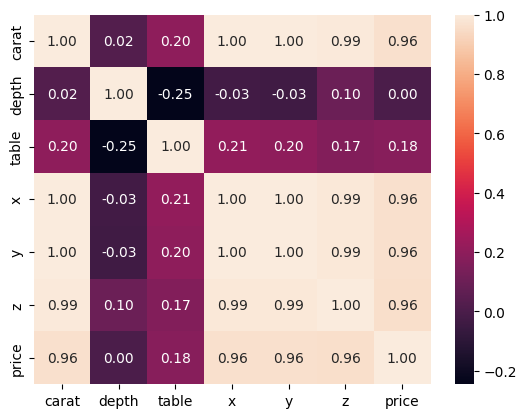

In [13]:
sns.heatmap(train_data.corr(method='spearman'), annot=True, fmt=".2f")

In [14]:
#train_data.drop(["x", "y", "z"], axis=1, inplace=True)

/tmp/ipykernel_9236/926737507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(method='spearman'), annot=True, fmt=".2f")


<AxesSubplot: >

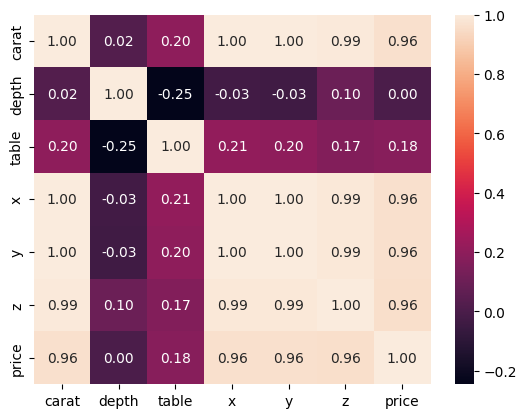

In [15]:
sns.heatmap(train_data.corr(method='spearman'), annot=True, fmt=".2f")

array([[<AxesSubplot: title={'center': 'carat'}>,
        <AxesSubplot: title={'center': 'depth'}>,
        <AxesSubplot: title={'center': 'table'}>],
       [<AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>,
        <AxesSubplot: title={'center': 'z'}>],
       [<AxesSubplot: title={'center': 'price'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

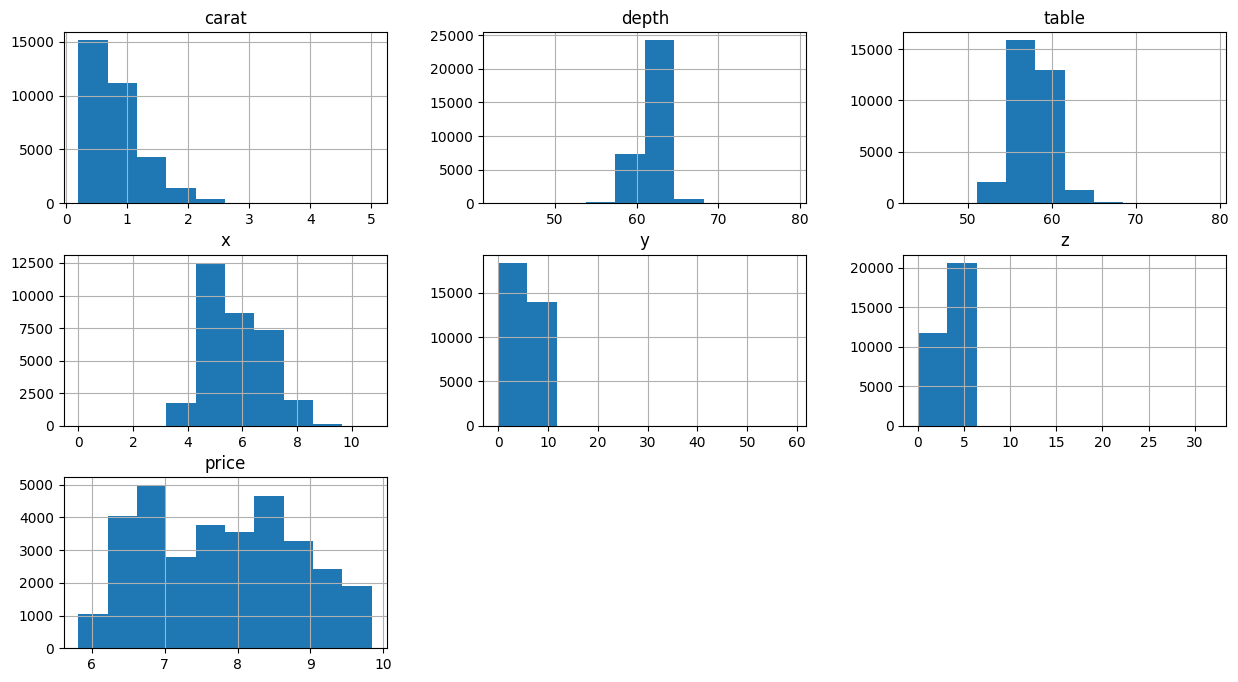

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
train_data["depth"] = np.log(train_data["depth"] + 1)
train_data["table"] = np.log(train_data["table"] + 1)
train_data["x"] = np.log(train_data["x"] + 1)
train_data["y"] = np.log(train_data["y"] + 1)
train_data["z"] = np.log(train_data["z"] + 1)

array([[<AxesSubplot: title={'center': 'carat'}>,
        <AxesSubplot: title={'center': 'depth'}>,
        <AxesSubplot: title={'center': 'table'}>],
       [<AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>,
        <AxesSubplot: title={'center': 'z'}>],
       [<AxesSubplot: title={'center': 'price'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

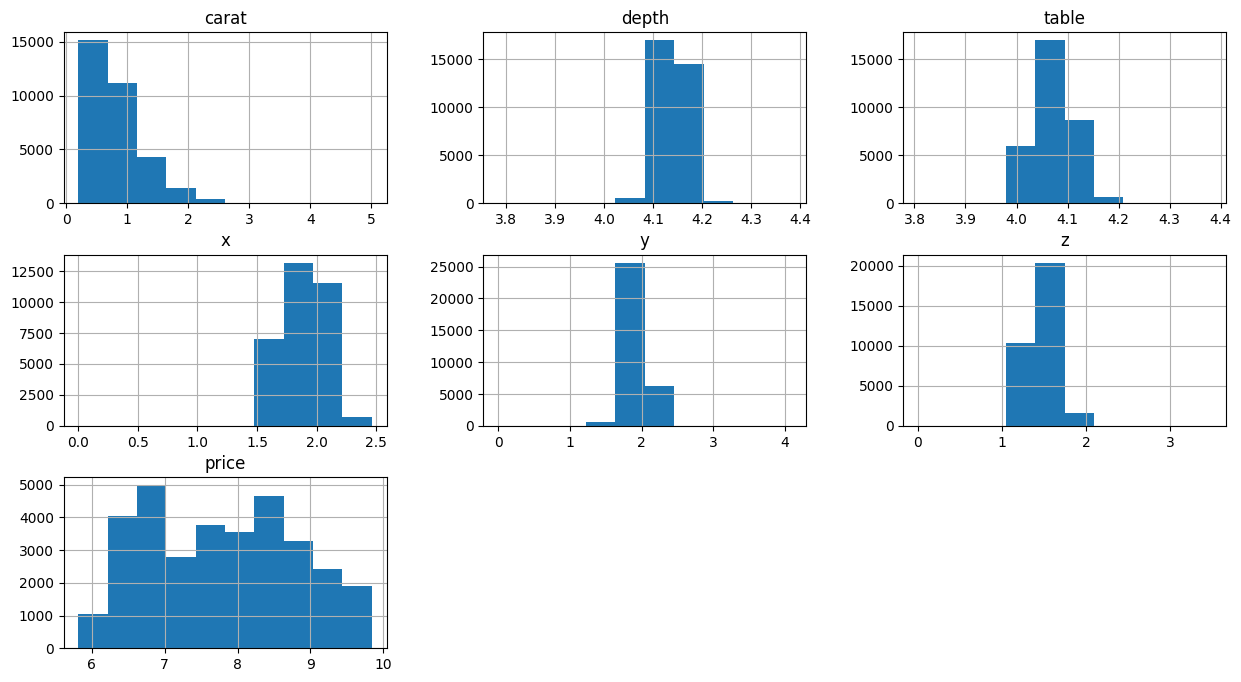

In [18]:
train_data.hist(figsize=(15,8))

## 2.1 One Hot Encoding + Normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
train_data = pd.get_dummies(data=train_data, drop_first=True)

In [21]:
train_data[:5]

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
24827,0.25,4.072440,4.143135,1.640937,1.646734,1.226712,6.306,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3095,0.34,4.135167,4.025352,1.702928,1.708378,1.327075,6.292,0,1,0,...,0,0,0,0,1,0,0,0,0,0
34637,0.89,4.114147,4.110874,1.971299,1.975469,1.553925,8.119,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21332,0.31,4.069027,4.110874,1.697449,1.706565,1.275363,6.075,1,0,0,...,1,0,0,0,0,0,1,0,0,0
27162,0.79,4.091006,4.143135,1.947338,1.950187,1.512927,7.511,0,0,0,...,0,0,1,0,1,0,0,0,0,0


<AxesSubplot: >

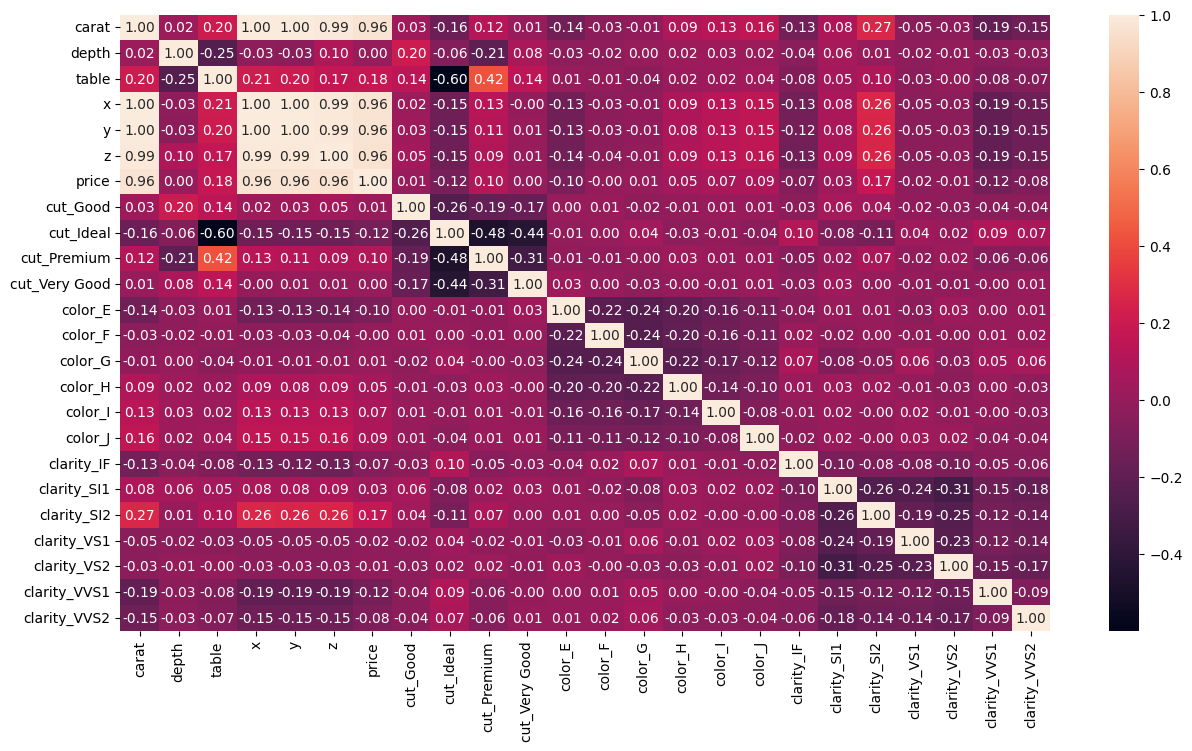

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(method='spearman'), annot=True, fmt=".2f")

In [23]:
train_data["price_carat"] = train_data["price"]/train_data["carat"]

<AxesSubplot: >

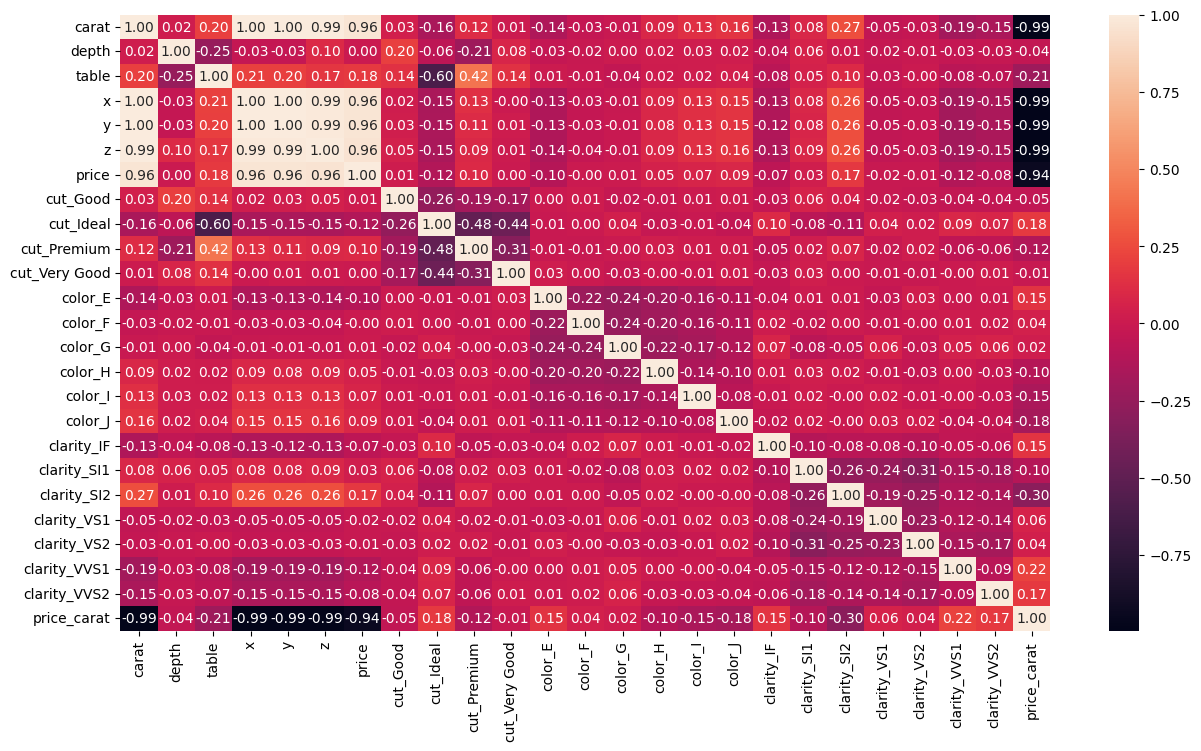

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(method='spearman'), annot=True, fmt=".2f")

In [25]:
train_data.drop(columns=["x", "y", "z", "price_carat"], inplace=True)

<AxesSubplot: >

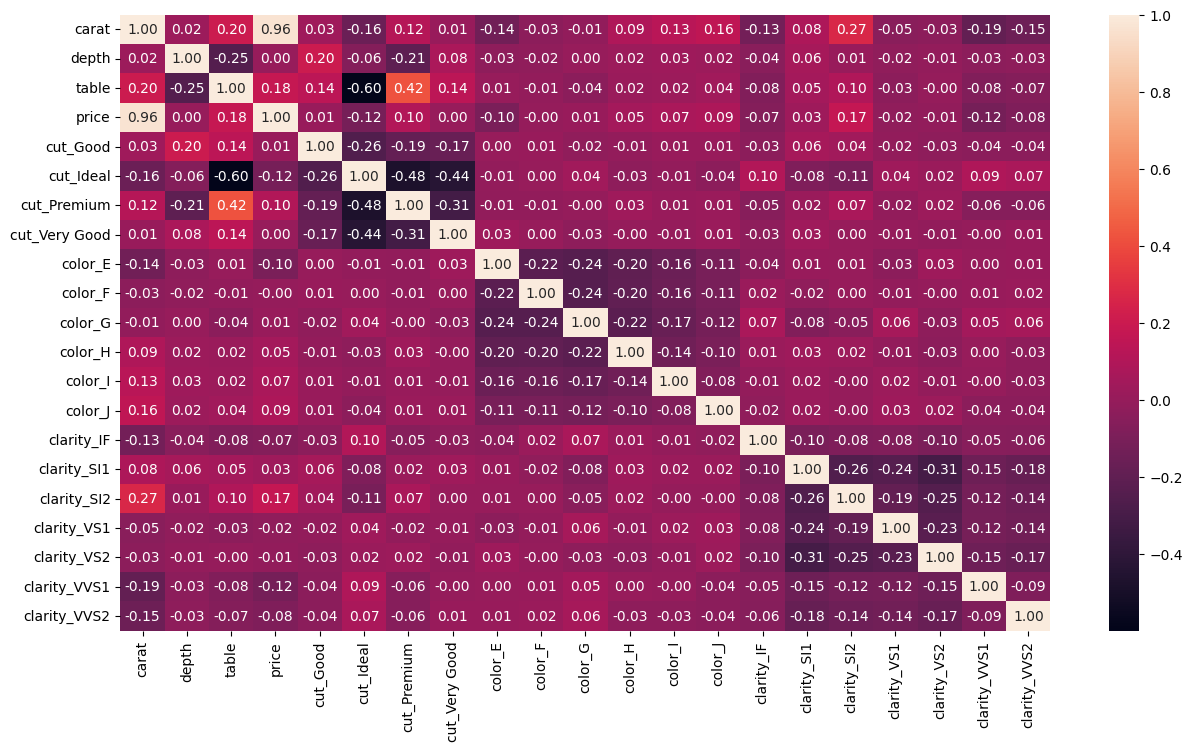

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(method='spearman'), annot=True, fmt=".2f")

In [27]:
x_train, y_train = train_data.drop(columns=("price")), train_data["price"]
x_train[:5]

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,
24827,0.25,4.072440,4.143135,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3095,0.34,4.135167,4.025352,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
34637,0.89,4.114147,4.110874,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
21332,0.31,4.069027,4.110874,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
27162,0.79,4.091006,4.143135,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0


In [28]:
min_max_Scaler = MinMaxScaler()

x_train_s = min_max_Scaler.fit_transform(x_train)
x_train_s = pd.DataFrame(x_train_s, columns=x_train.columns)
x_train_s.set_index(keys=x_train.index, inplace=True)

In [29]:
min_max_Scaler.data_max_

array([5.01      , 4.38202663, 4.38202663, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

## 2.2 Removing outliers

In [30]:
import eif as iso

In [31]:
train_data = x_train_s.join(y_train)
train_data[:5]

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
id,,,,,,,,,,,,,,,,,,,,,
24827,0.010395,0.482155,0.584799,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.306
3095,0.029106,0.587078,0.380088,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.292
34637,0.143451,0.551919,0.528728,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.119
21332,0.022869,0.476446,0.528728,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.075
27162,0.122661,0.513210,0.584799,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.511


In [32]:
X = train_data[["carat", "depth", "table", "price"]]
X[:5]

,carat,depth,table,price
id,,,,
24827,0.010395,0.482155,0.584799,6.306
3095,0.029106,0.587078,0.380088,6.292
34637,0.143451,0.551919,0.528728,8.119
21332,0.022869,0.476446,0.528728,6.075
27162,0.122661,0.513210,0.584799,7.511


In [33]:
column_eif = iso.iForest(
    X.values, ntrees=500, sample_size=256, ExtensionLevel=1)

In [34]:
S1 = column_eif.compute_paths(X_in = X.values)

In [35]:
indexes_eif = np.argsort(S1)[-int(len(S1) * 0.05):]

train_data.reset_index(inplace=True)
train_data[:5]

,id,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,24827,0.010395,0.482155,0.584799,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.306
1,3095,0.029106,0.587078,0.380088,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.292
2,34637,0.143451,0.551919,0.528728,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.119
3,21332,0.022869,0.476446,0.528728,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.075
4,27162,0.122661,0.513210,0.584799,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.511


In [36]:
train_data.drop(index=indexes_eif, inplace=True)

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'carat'}>,
        <AxesSubplot: title={'center': 'depth'}>,
        <AxesSubplot: title={'center': 'table'}>,
        <AxesSubplot: title={'center': 'cut_Good'}>],
       [<AxesSubplot: title={'center': 'cut_Ideal'}>,
        <AxesSubplot: title={'center': 'cut_Premium'}>,
        <AxesSubplot: title={'center': 'cut_Very Good'}>,
        <AxesSubplot: title={'center': 'color_E'}>,
        <AxesSubplot: title={'center': 'color_F'}>],
       [<AxesSubplot: title={'center': 'color_G'}>,
        <AxesSubplot: title={'center': 'color_H'}>,
        <AxesSubplot: title={'center': 'color_I'}>,
        <AxesSubplot: title={'center': 'color_J'}>,
        <AxesSubplot: title={'center': 'clarity_IF'}>],
       [<AxesSubplot: title={'center': 'clarity_SI1'}>,
        <AxesSubplot: title={'center': 'clarity_SI2'}>,
        <AxesSubplot: title={'center': 'clarity_VS1'}>,
        <AxesSubplot: title={'center': 'clar

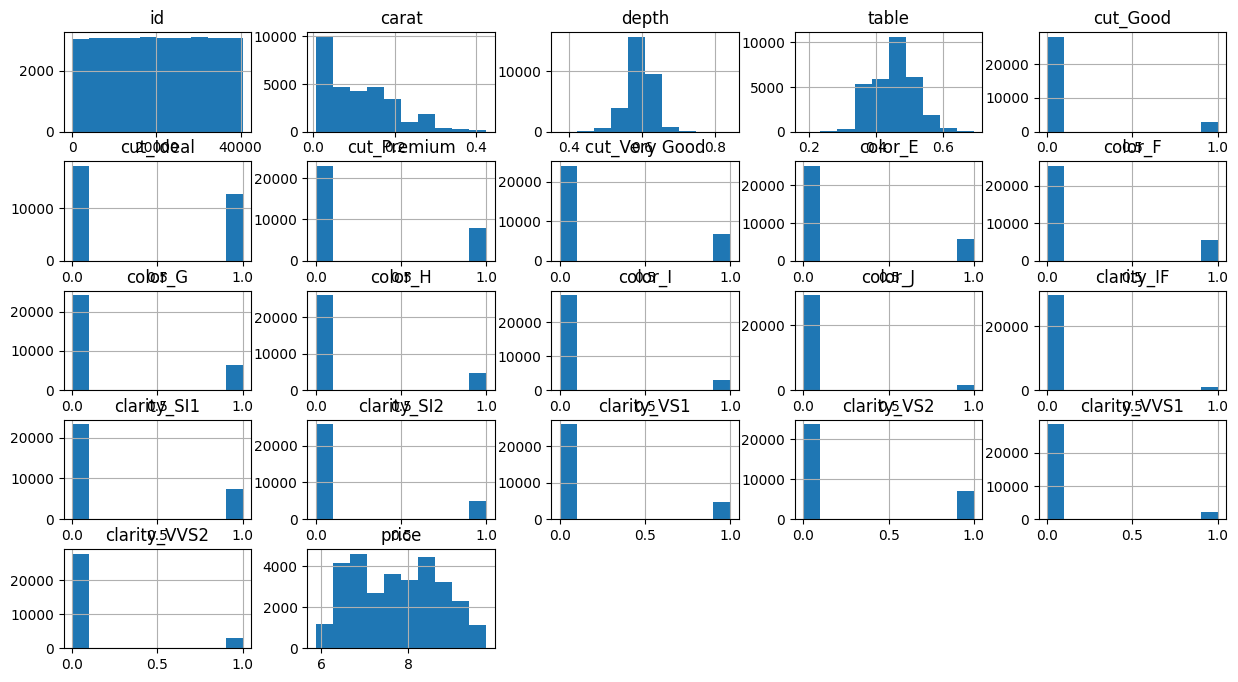

In [37]:
train_data.hist(figsize=(15,8))

In [38]:
train_data.set_index(train_data["id"], inplace=True)
train_data.drop(columns=("id"), inplace=True)

In [39]:
train_data[:5]

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
id,,,,,,,,,,,,,,,,,,,,,
3095,0.029106,0.587078,0.380088,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.292
34637,0.143451,0.551919,0.528728,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.119
27162,0.122661,0.513210,0.584799,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.511
38617,0.174636,0.584399,0.470789,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.626
3007,0.168399,0.540950,0.528728,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.425


In [40]:
x_train_s, y_train = train_data.drop(columns=("price")), train_data["price"]

# 3. Comperison baseline-models

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor

In [42]:
x_test = pd.get_dummies(x_test, drop_first=True)

x_test.drop(columns=["x", "y", "z"], inplace=True)
x_test.describe()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000
mean,0.794657,61.743542,57.459597,0.087010,0.398715,0.253986,0.229143,0.186627,0.172908,0.206031,0.151403,0.101718,0.053393,0.032876,0.238537,0.171672,0.142875,0.235447,0.070696,0.093066
std,0.477001,1.442209,2.278777,0.281868,0.489664,0.435317,0.420308,0.389636,0.378191,0.404478,0.358463,0.302296,0.224829,0.178323,0.426215,0.377119,0.349967,0.424304,0.256332,0.290543
min,0.200000,52.300000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.500000,78.200000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
x_test["carat"] = np.log(x_test["carat"] + 1)
x_test["depth"] = np.log(x_test["depth"] + 1)
x_test["table"] = np.log(x_test["table"] + 1)

In [44]:
x_test_s = min_max_Scaler.transform(x_test)

x_test_s = pd.DataFrame(x_test_s, index=x_test.index, columns=x_test.columns)
x_test_s.describe()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000,8091.000000
mean,0.073423,0.593142,0.453509,0.087010,0.398715,0.253986,0.229143,0.186627,0.172908,0.206031,0.151403,0.101718,0.053393,0.032876,0.238537,0.171672,0.142875,0.235447,0.070696,0.093066
std,0.051115,0.038436,0.066503,0.281868,0.489664,0.435317,0.420308,0.389636,0.378191,0.404478,0.358463,0.302296,0.224829,0.178323,0.426215,0.377119,0.349967,0.424304,0.256332,0.290543
min,-0.003675,0.320734,0.217537,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.028373,0.573643,0.410851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.068738,0.595088,0.441078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.106642,0.613629,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.312837,0.983189,1.316880,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Линейная регрессия

In [65]:
regression = LinearRegression()
regression.fit(x_train_s.values, y_train.values)

LinearRegression()

In [46]:
y_pred = regression.predict(x_test_s.values)
y_pred[:5]

array([6.82216743, 7.96828188, 6.54378009, 6.67291412, 6.98060452])

In [47]:
mean_squared_error(y_test.values, y_pred)

0.5714427282058435

Полиномиальная регрессия 2 степени

In [48]:
poly_2 = PolynomialFeatures(degree=2)
x_poly_2 = poly_2.fit_transform(x_train_s.values)
poly_2.fit(x_poly_2, y_train.values)

PolynomialFeatures()

In [49]:
regression_2 = LinearRegression()
regression_2.fit(x_poly_2, y_train.values)

LinearRegression()

In [50]:
y_pred = regression_2.predict(poly_2.fit_transform(x_test_s.values))
y_pred[:5]

array([6.68448179, 8.22438254, 6.21054282, 6.34459128, 6.86049094])

In [51]:
mean_squared_error(y_test.values, y_pred)

0.4106850916034975

RandomForest

In [53]:
forest = RandomForestRegressor(random_state=42)

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [54]:
y_pred = forest.predict(x_test_s)
y_pred[:5]

array([6.591678  , 8.223305  , 6.0825    , 6.235285  , 6.77393333])

In [55]:
mean_squared_error(y_test.values, y_pred)

0.4249715056428596

XGBoost

In [59]:
xgbregressor = XGBRegressor(random_state = 42)

xgbregressor.fit(x_train_s, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [60]:
y_pred = xgbregressor.predict(x_test_s)
y_pred[:5]

array([6.600808 , 8.245752 , 6.016189 , 6.305529 , 6.8173714],
      dtype=float32)

In [61]:
mean_squared_error(y_test.values, y_pred)

0.42229081383757827

KNN

In [69]:
knn_regressor = KNeighborsRegressor()

knn_regressor.fit(x_train_s, y_train)

KNeighborsRegressor()

In [70]:
y_pred = knn_regressor.predict(x_test_s)
y_pred[:5]

array([6.7756, 8.3934, 6.1824, 6.6062, 6.8074])

In [71]:
mean_squared_error(y_test.values, y_pred)

0.4224379857718452